### DISCUS Python API

This is the first version of a simple Python API for the DISCUS Suite.

In [41]:
class Diffuse():
    import sys
    import numpy as np
    from suite_python import suite
    
    def __init__(self, libpath="/usr/local/lib"):
        """Initializes the DISCUS Suite"""
        
        sys.path.append(libpath)
        self.suite.initialize_suite()
        
    def macro(self, name):
        """Execute macro"""
        
        self.suite.execute_macro('@'+name)
        
    def get_data(self, data_set_id):
        """Get 1D data stored in KUPLOT data set id"""
        
        n=self.suite.get_data_length(data_set_id)
        x=np.empty(n, dtype=np.float32)
        y=np.empty(n, dtype=np.float32)
        self.suite.get_data(data_set_id,x,y,n)
        
        return(x,y)
    
    def get_data_2d(self, data_set_id):
        """Get 2D data set stored in KUPLOT data set id"""
        
        n=self.suite.get_data_length(data_set_id)
        nx=np.array(1, dtype=np.int32)
        ny=np.array(1, dtype=np.int32)
        x=np.empty(n, dtype=np.float32)
        y=np.empty(n, dtype=np.float32)
        z=np.empty(n, dtype=np.float32)
        self.suite.get_data_3d(data_set_id,x,y,z,nx,ny,n)
        
        return(np.reshape(x,(nx,ny)), np.reshape(y,(nx,ny)), np.reshape(z,(nx,ny)))
    
    def get_value(self, var_name):
        """Gets the value of the variable/expression given from DISCUS"""
        
        return( self.suite.get_value(var_name))
    
    def set_value(self, var_name, value):
        """Sets the value of the DISCUS variable given"""
        
        self.suite.set_value(value, var_name)


### Testing

In [42]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

In [43]:
diffuse = Diffuse()

In [48]:
diffuse.set_value('r[1]', 2.1)

 ***FORT*** Variable is not defined                       *** -24 ***


In [58]:
diffuse.macro("powder.mac neut")

<IPython.core.display.Javascript object>


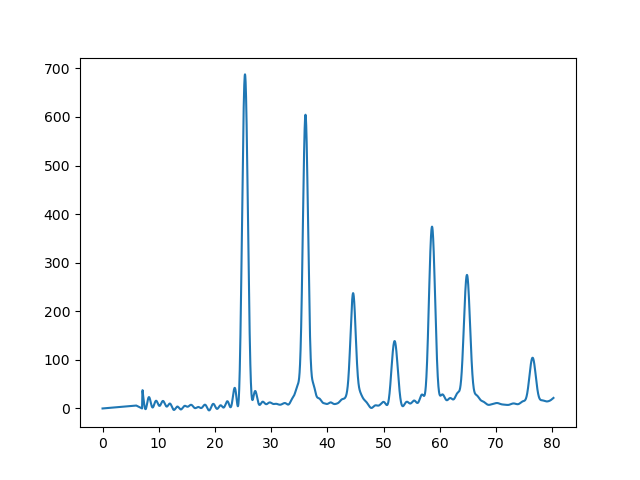

In [59]:
(x,y) = diffuse.get_data(1)

fig = plt.figure()
plt.plot(x, y)
plt.show()

In [60]:
diffuse.macro("plot3d")

<IPython.core.display.Javascript object>


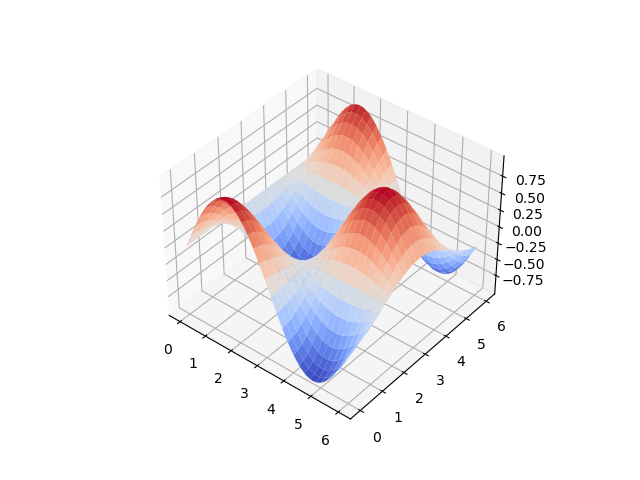

In [61]:
(x,y,z) = diffuse.get_data_2d(1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z, cmap=cm.coolwarm)